<a href="https://colab.research.google.com/github/keerthanabalakrishnan15/Mini-Project/blob/main/ML_MINOR_MAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader 

In [2]:
!mkdir images


In [3]:
from bing_image_downloader import downloader
downloader.download("scooty",limit=50,output_dir='images')

[%] Downloading Images to /content/images/scooty


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://images.assettype.com/freepressjournal%2Fimport%2F2016%2F04%2Fscooty.png?w=1200&amp;auto=format%2Ccompress&amp;ogImage=true
[%] File Downloaded !

[%] Downloading Image #2 from https://blog.gaadikey.com/wp-content/uploads/2019/04/TVS-Scooty_Red.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.xyj.in/wp-content/uploads/2015/09/TVS-Scooty-Pep-Plus.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://bikes.bestcarmag.com/sites/default/files/tvs/scooty-teenz/2011/2011-tvs-scooty-teenz-85518-61.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://blog.quikr.com/wp-content/uploads/2015/10/Vespa-SXL-150-blue-colour-option.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://images.financialexpress.com/2018/06/maestro-edge-BS4-12-660x440.jpg?w=660&amp;h=440&amp;imflag=true
[%] File Downloaded !

[%

In [4]:
from bing_image_downloader import downloader
downloader.download("car",limit=50,output_dir='images')

[%] Downloading Images to /content/images/car


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from http://www.carbodydesign.com/archive/2009/08/05-sv-9-competizione-images/SV-9-Competizione-4-lg.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://static.carthrottle.com/workspace/uploads/posts/2017/12/0fcad9c9368abebdbfb8aaf0211bf96b.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://jaikrishnaamaruti.com/uploads/truevalue_cars/0_27-01-2018_16-03-53.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://icdn-4.motor1.com/images/mgl/8gJ93/s1/amc-amx-the-first-true-sports-car-of-the-1960s.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://daxstreet.com/wp-content/uploads/2020/12/gtr-1024x576.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://farm9.staticflickr.com/8012/7170866083_8504026441_o.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://smclassiccars.com/uploads/postfotos/

In [5]:
from bing_image_downloader import downloader
downloader.download("heavy truck",limit=30,output_dir='images')

[%] Downloading Images to /content/images/heavy truck


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.tenfourmagazine.com/content/wp-content/uploads/sites/1/nggallery/feb2019cover/FebCvrStry16.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/fa/e0/70/fae070f29b42d1ec80fc7f253ff975aa.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/af/8c/de/af8cdea6b3a6f9a2f59094fdd5385c5a.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://thecarsoftulelake.com/wp-content/uploads/2018/06/2017-06-29-21.07.42-1200x750.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://thecarsoftulelake.com/wp-content/uploads/2018/06/2017-06-29-21.08.17-1200x750.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/736x/a2/12/21/a21221b1776662253cc896811320b742.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://truetowing.com/wp-co

In [6]:
#preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['scooty','car','heavy truck']

for category in CATEGORIES:
    class_num = CATEGORIES.index(category)
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
      img_arr = imread(os.path.join(path,img))
      img_resized = resize(img_arr,(150,150,3))
      flat_data.append(img_resized.flatten())
      images.append(img_resized)
      target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=.3,random_state=109)


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              { 'C':[1,10,100,1000],'kernel':['linear']},
              { 'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [9]:
y_pred = clf.predict(x_test)
y_pred

array([2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1])

In [10]:
y_test


array([2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0])

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [12]:
accuracy_score(y_pred,y_test)

0.6666666666666666

In [13]:
confusion_matrix(y_pred,y_test)

array([[ 9,  3,  1],
       [ 1, 12,  3],
       [ 2,  3,  5]])

In [14]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [15]:
model = pickle.load(open('img_model.p','rb'))

ENTER THE URLhttps://images.all-free-download.com/images/graphicthumb/heavy_equipment_187329.jpg
(368, 549, 3)
PREDICTED OUTPUT:heavy truck


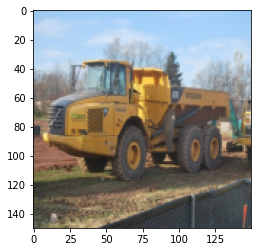

In [33]:
#testing
flat_data = []
url = input('ENTER THE URL')
# car test url = https://images.all-free-download.com/images/graphiclarge/nissan_silver_514647.jpg
# scooty test url = https://imgd.aeplcdn.com/476x268/bw/models/tvs-scooty-pep-plus-bs-vi20200401185937.jpg
# heavy test url = https://images.all-free-download.com/images/graphicthumb/heavy_equipment_187329.jpg

img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')